# Weekly Riderhship EDA
--------------

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pylab import rcParams

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

from sklearn import metrics
from sklearn.model_selection import train_test_split


plt.style.use('fivethirtyeight')

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)




In [3]:
df = pd.read_csv('../../capstone-data/weekly-merged.csv')

In [4]:
df['date'] = pd.to_datetime(df['date'])

In [5]:
df = df.set_index('date').asfreq('W-Mon')

In [6]:
df

,bus,rail_boardings,total_rides,prcp,tmax,tmin,gas_open,gas_close,gas_volume,3_mo,6_mo,1_yr,2_yr,3_yr,5_yr,7_yr,10_yr,20_yr,C1_School closing,C2_Workplace closing,C3_Cancel public events,C4_Restrictions on gatherings,C5_Close public transport,C6_Stay at home requirements,C7_Restrictions on internal movement,C8_International travel controls,E1_Income support,E2_Debt/contract relief,H1_Public information campaigns,H2_Testing policy,H3_Contact tracing,H6_Facial Coverings,H7_Vaccination policy,H8_Protection of elderly people,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyLegacyIndex,GovernmentResponseIndex,ContainmentHealthIndex,EconomicSupportIndex,total_daily_doses,total_daily_cum,first_dose_daily,first_dose_cum,first_dose_percent_pop,vax_series_completed_daily,vax_series_cum,vax_series_percent,crash_occurrences,damage_indicator,gas_price
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2001-01-01,297192.0,126455.0,423647.0,0.000000,26.000000,13.000000,0.794000,0.795000,14697.000000,5.870000,5.580000,5.110000,4.870000,4.820000,4.760000,4.970000,4.920000,5.460000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.000000,0.00,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,1.487
2001-01-08,5304650.0,3162199.0,8466849.0,0.000000,31.142857,17.285714,0.811429,0.817157,17527.571429,5.354286,5.170000,4.768571,4.682857,4.682857,4.735714,4.992857,4.974286,5.522857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.000000,0.00,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,1.477
2001-01-15,5618534.0,3271759.0,8890293.0,0.037143,35.571429,26.142857,0.872286,0.886529,14497.714286,5.308571,5.200000,4.887143,4.824286,4.835714,4.898571,5.164286,5.174286,5.680000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.000000,0.00,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,1.569
2001-01-22,5926682.0,3479888.0,9406570.0,0.000000,29.285714,17.714286,0.868500,0.875129,16529.142857,5.281429,5.155714,4.825714,4.778571,4.788571,4.851429,5.147143,5.195714,5.662857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.000000,0.00,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,1.546
2001-01-29,5894412.0,3453667.0,9348079.0,0.120000,32.142857,20.285714,0.877500,0.880143,14571.857143,5.202857,5.087143,4.817143,4.788571,4.814286,4.948571,5.240000,5.301429,5.757143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.000000,0.00,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,1.541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-08,2760963.0,2012026.0,4772989.0,0.000000,55.142857,35.714286,2.328500,2.319557,80192.714286,0.050000,0.070000,0.148571,0.422857,0.702857,1.098571,1.361429,1.507143,1.927143,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.714286,1.0,1.0,2.0,3.0,2.0,2.0,5.0,2.0,11979155.0,198543.0,24.205714,33.50,44.344286,45.32,37.5,11094.714286,24238965.0,2880.857143,12262639.0,0.650286,1698.714286,11295344.0,0.599000,2147.0,2.579138,3.616
2021-11-15,2554455.0,1914422.0,4468877.0,0.000000,47.285714,36.142857,2.322543,2.321886,71787.000000,0.048571,0.067143,0.167143,0.507143,0.827143,1.217143,1.448571,1.564286,1.971429,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,1.0,1.0,2.0,3.0,2.0,2.0,5.0,2.0,12129124.0,199443.0,19.440000,27.38,41.670000,42.26,37.5,13830.428571,24871296.0,5320.714286,12486916.0,0.662143,1562.285714,11374567.0,0.603143,2099.0,2.590238,3.557
2021-11-22,2670145.0,2028963.0,4699108.0,0.000000,48.857143,31.714286,2.297986,2.260029,45781.285714,0.050000,0.062857,0.181429,0.538571,0.870000,1.245714,1.482857,1.581429,1.998571,0.0,0.0,0.0,0.0,0.0,0.

In [7]:
df.index.duplicated().sum()

0

In [8]:
df.index

DatetimeIndex(['2001-01-01', '2001-01-08', '2001-01-15', '2001-01-22',
               '2001-01-29', '2001-02-05', '2001-02-12', '2001-02-19',
               '2001-02-26', '2001-03-05',
               ...
               '2021-10-04', '2021-10-11', '2021-10-18', '2021-10-25',
               '2021-11-01', '2021-11-08', '2021-11-15', '2021-11-22',
               '2021-11-29', '2021-12-06'],
              dtype='datetime64[ns]', name='date', length=1093, freq='W-MON')

In [9]:
df = df.drop(df.tail(1).index)
df = df.drop(df.head(1).index)

In [10]:
# Code modified from code written by Matthew Garton.

def plot_series(df, cols=None, title='Title', xlab=None, ylab=None, steps=1):
    
    # Set figure size to be (18, 9).
    plt.figure(figsize=(18,9))
    
    # Iterate through each column name.
    for col in cols:
            
        # Generate a line plot of the column name.
        # You only have to specify Y, since our
        # index will be a datetime index.
        plt.plot(df[col])
        
    # Generate title and labels.
    plt.title(title, fontsize=26)
    plt.xlabel(xlab, fontsize=20)
    plt.ylabel(ylab, fontsize=20)
    
    # Enlarge tick marks.
    plt.yticks(fontsize=18)
    plt.xticks(df.index[0::steps], fontsize=18);

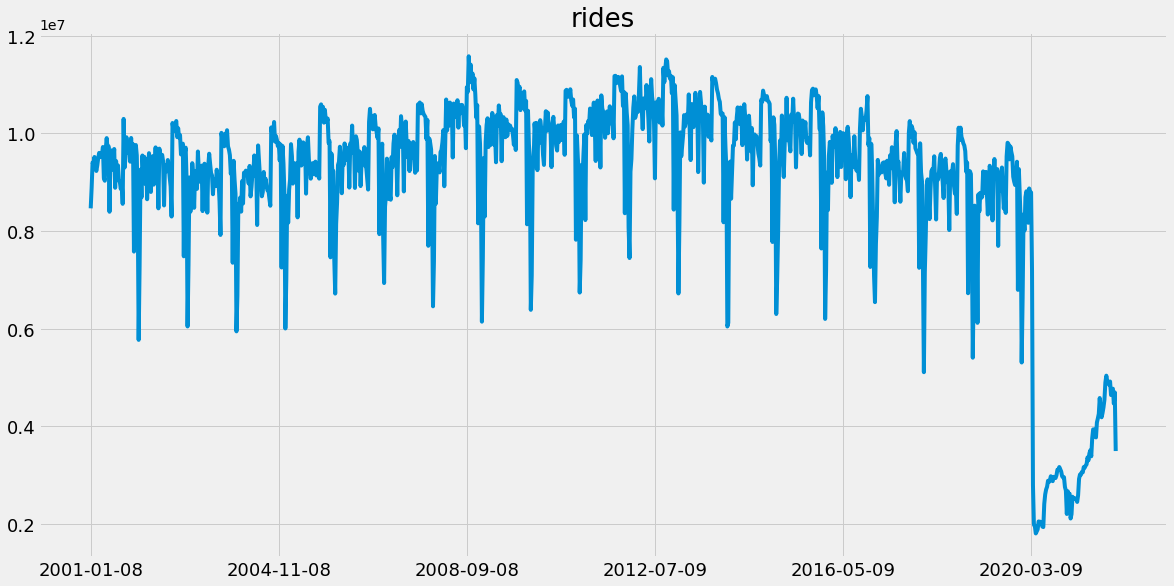

In [11]:
plot_series(df,['total_rides'], title='rides',steps=200)

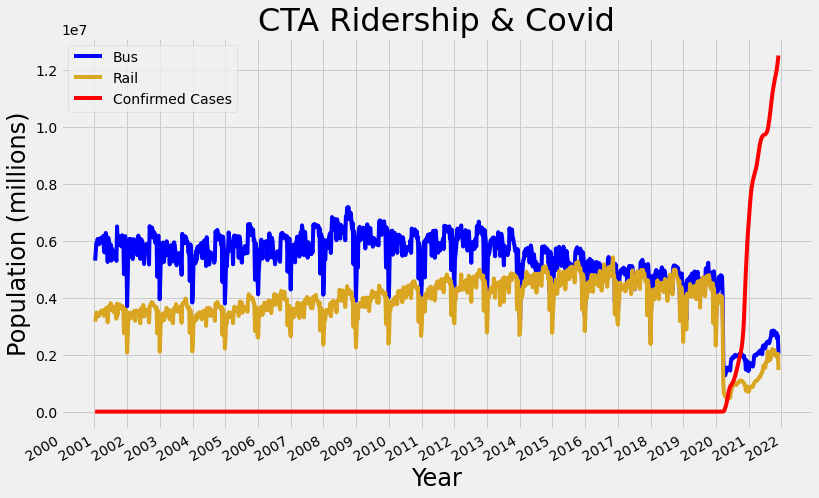

In [11]:
plt.figure(figsize=(12,8))

plt.plot(df['bus'],label='Bus',color='blue',)
plt.plot(df['rail_boardings'],label='Rail',color='goldenrod',);
plt.plot(df['ConfirmedCases'],label='Confirmed Cases',color='red',)

plt.title('CTA Ridership & Covid',size=32)
plt.xlabel('Year',size=24)
plt.ylabel('Population (millions)',size=24)
plt.legend();

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gcf().autofmt_xdate() # Rotation
plt.show()


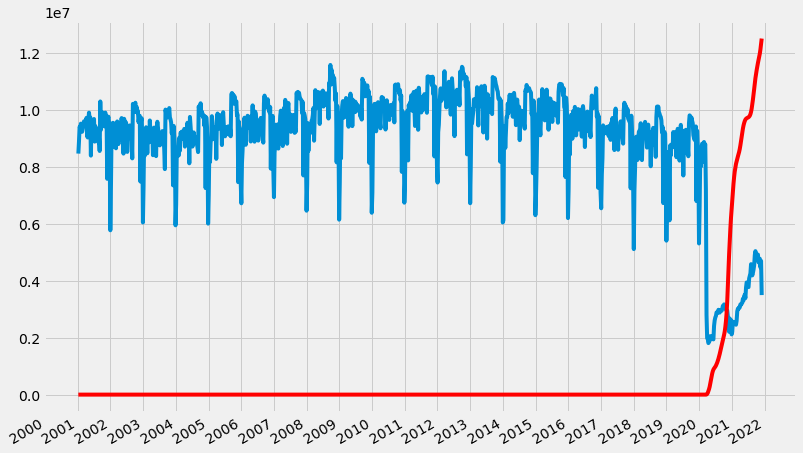

In [12]:
plt.figure(figsize=(12,8))

plt.plot(df['total_rides'],label='Rail',);
plt.plot(df['ConfirmedCases'],label='Confirmed Cases',color='red',)
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gcf().autofmt_xdate() # Rotation
plt.show()


In [13]:
decomp = seasonal_decompose(df['total_rides'].dropna())


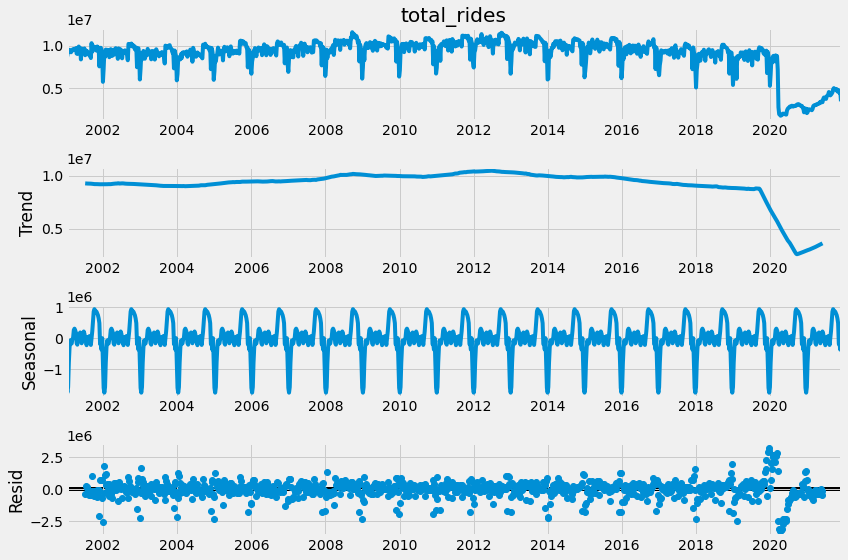

In [14]:
rcParams['figure.figsize'] = (12, 8)
decomp.plot();

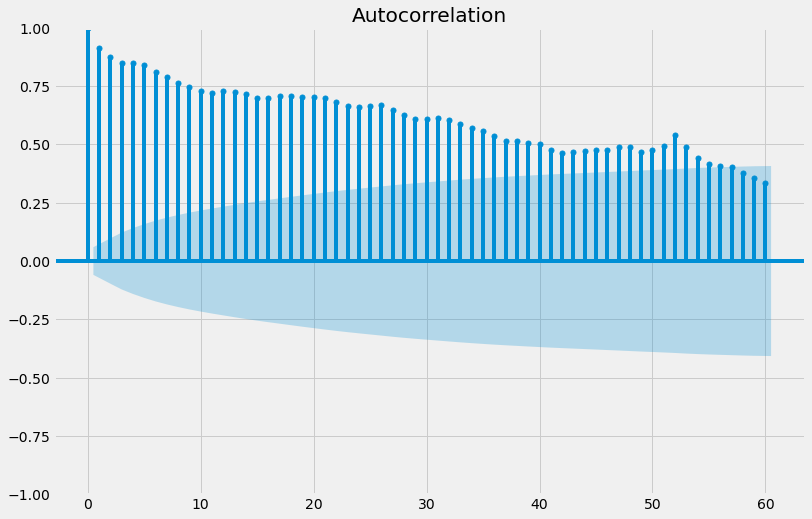

In [15]:
plot_acf(df['total_rides'],lags=60);

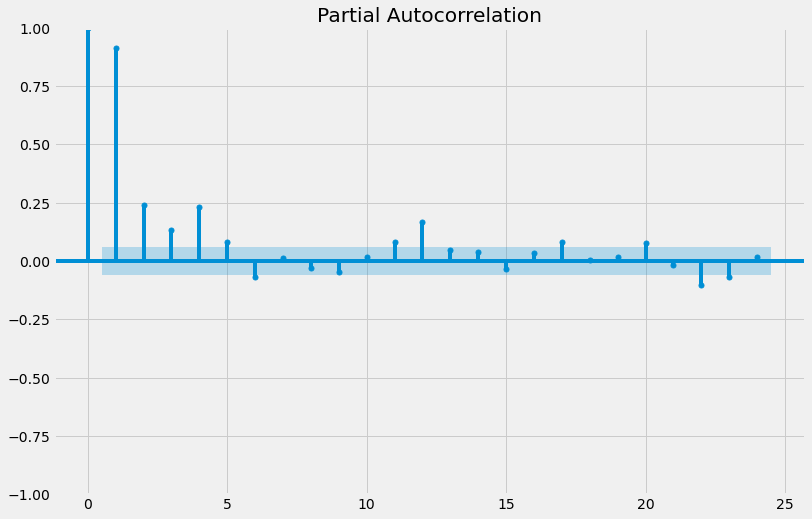

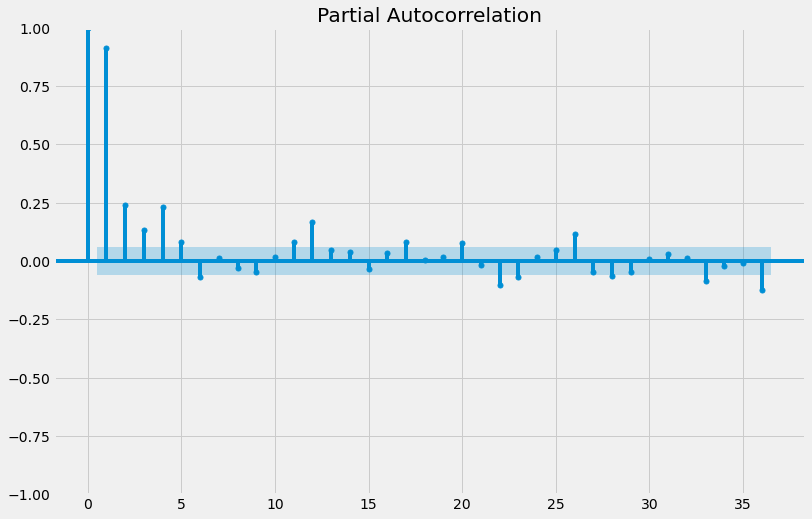

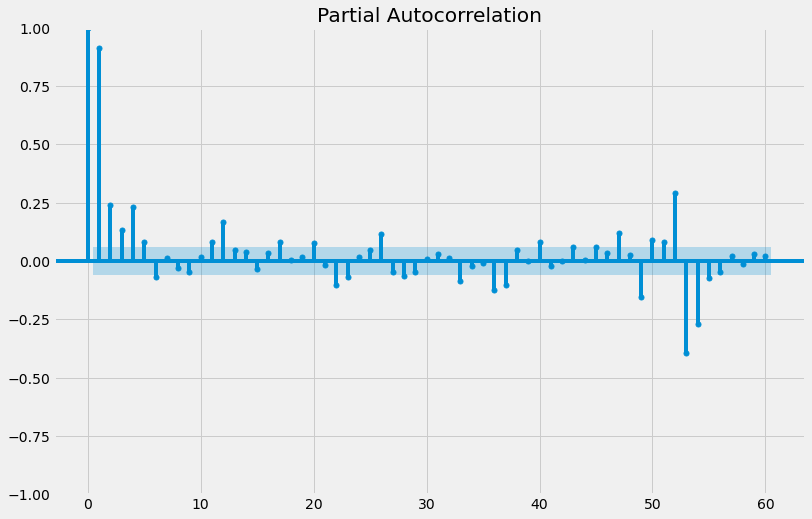

In [169]:
plot_pacf(df['total_rides'], lags=24,method='ywm');
plot_pacf(df['total_rides'], lags=36,method='ywm');
plot_pacf(df['total_rides'], lags=60,method='ywm');


In [157]:
test = df[['total_rides']].copy()

In [62]:
test['3_lags'] = df['total_rides'].shift(52)
test.corr()

,total_rides,3_lags
total_rides,1.000000,0.690461
3_lags,0.690461,1.000000


In [63]:
rides = df[['total_rides']].copy()

In [64]:
rides['lag_1'] = rides['total_rides'].shift(1)
rides['lag_2'] = rides['total_rides'].shift(2)
rides['lag_3'] = rides['total_rides'].shift(3)
rides['lag_4'] = rides['total_rides'].shift(4)
rides['lag_5'] = rides['total_rides'].shift(5)
rides['lag_14'] = rides['total_rides'].shift(12)
rides['lag_52'] = rides['total_rides'].shift(52)

rides['time'] = range(0, rides.shape[0])

In [160]:
rides.corr()

,total_rides,lag_1,lag_2,lag_3,lag_4,lag_5,lag_14,lag_52,time
total_rides,1.000000,0.918273,0.881533,0.856505,0.858138,0.849347,0.749586,0.690461,-0.409600
lag_1,0.918273,1.000000,0.917959,0.880912,0.855849,0.857479,0.737723,0.618182,-0.407181
lag_2,0.881533,0.917959,1.000000,0.917578,0.880385,0.855207,0.742527,0.589805,-0.405140
lag_3,0.856505,0.880912,0.917578,1.000000,0.917201,0.879829,0.757189,0.570567,-0.402998
lag_4,0.858138,0.855849,0.880385,0.917201,1.000000,0.916836,0.776162,0.590719,-0.400959
lag_5,0.849347,0.857479,0.855207,0.879829,0.916836,1.000000,0.796765,0.583237,-0.398900
lag_14,0.749586,0.737723,0.742527,0.757189,0.776162,0.796765,1.000000,0.547633,-0.384462
lag_52,0.690461,0.618182,0.589805,0.570567,0.590719,0.583237,0.547633,1.000000,-0.253563
time,-0.409600,-0.407181,-0.405140,-0.402998,-0.400959,-0.398900,-0.384462,-0.253563,1.000000


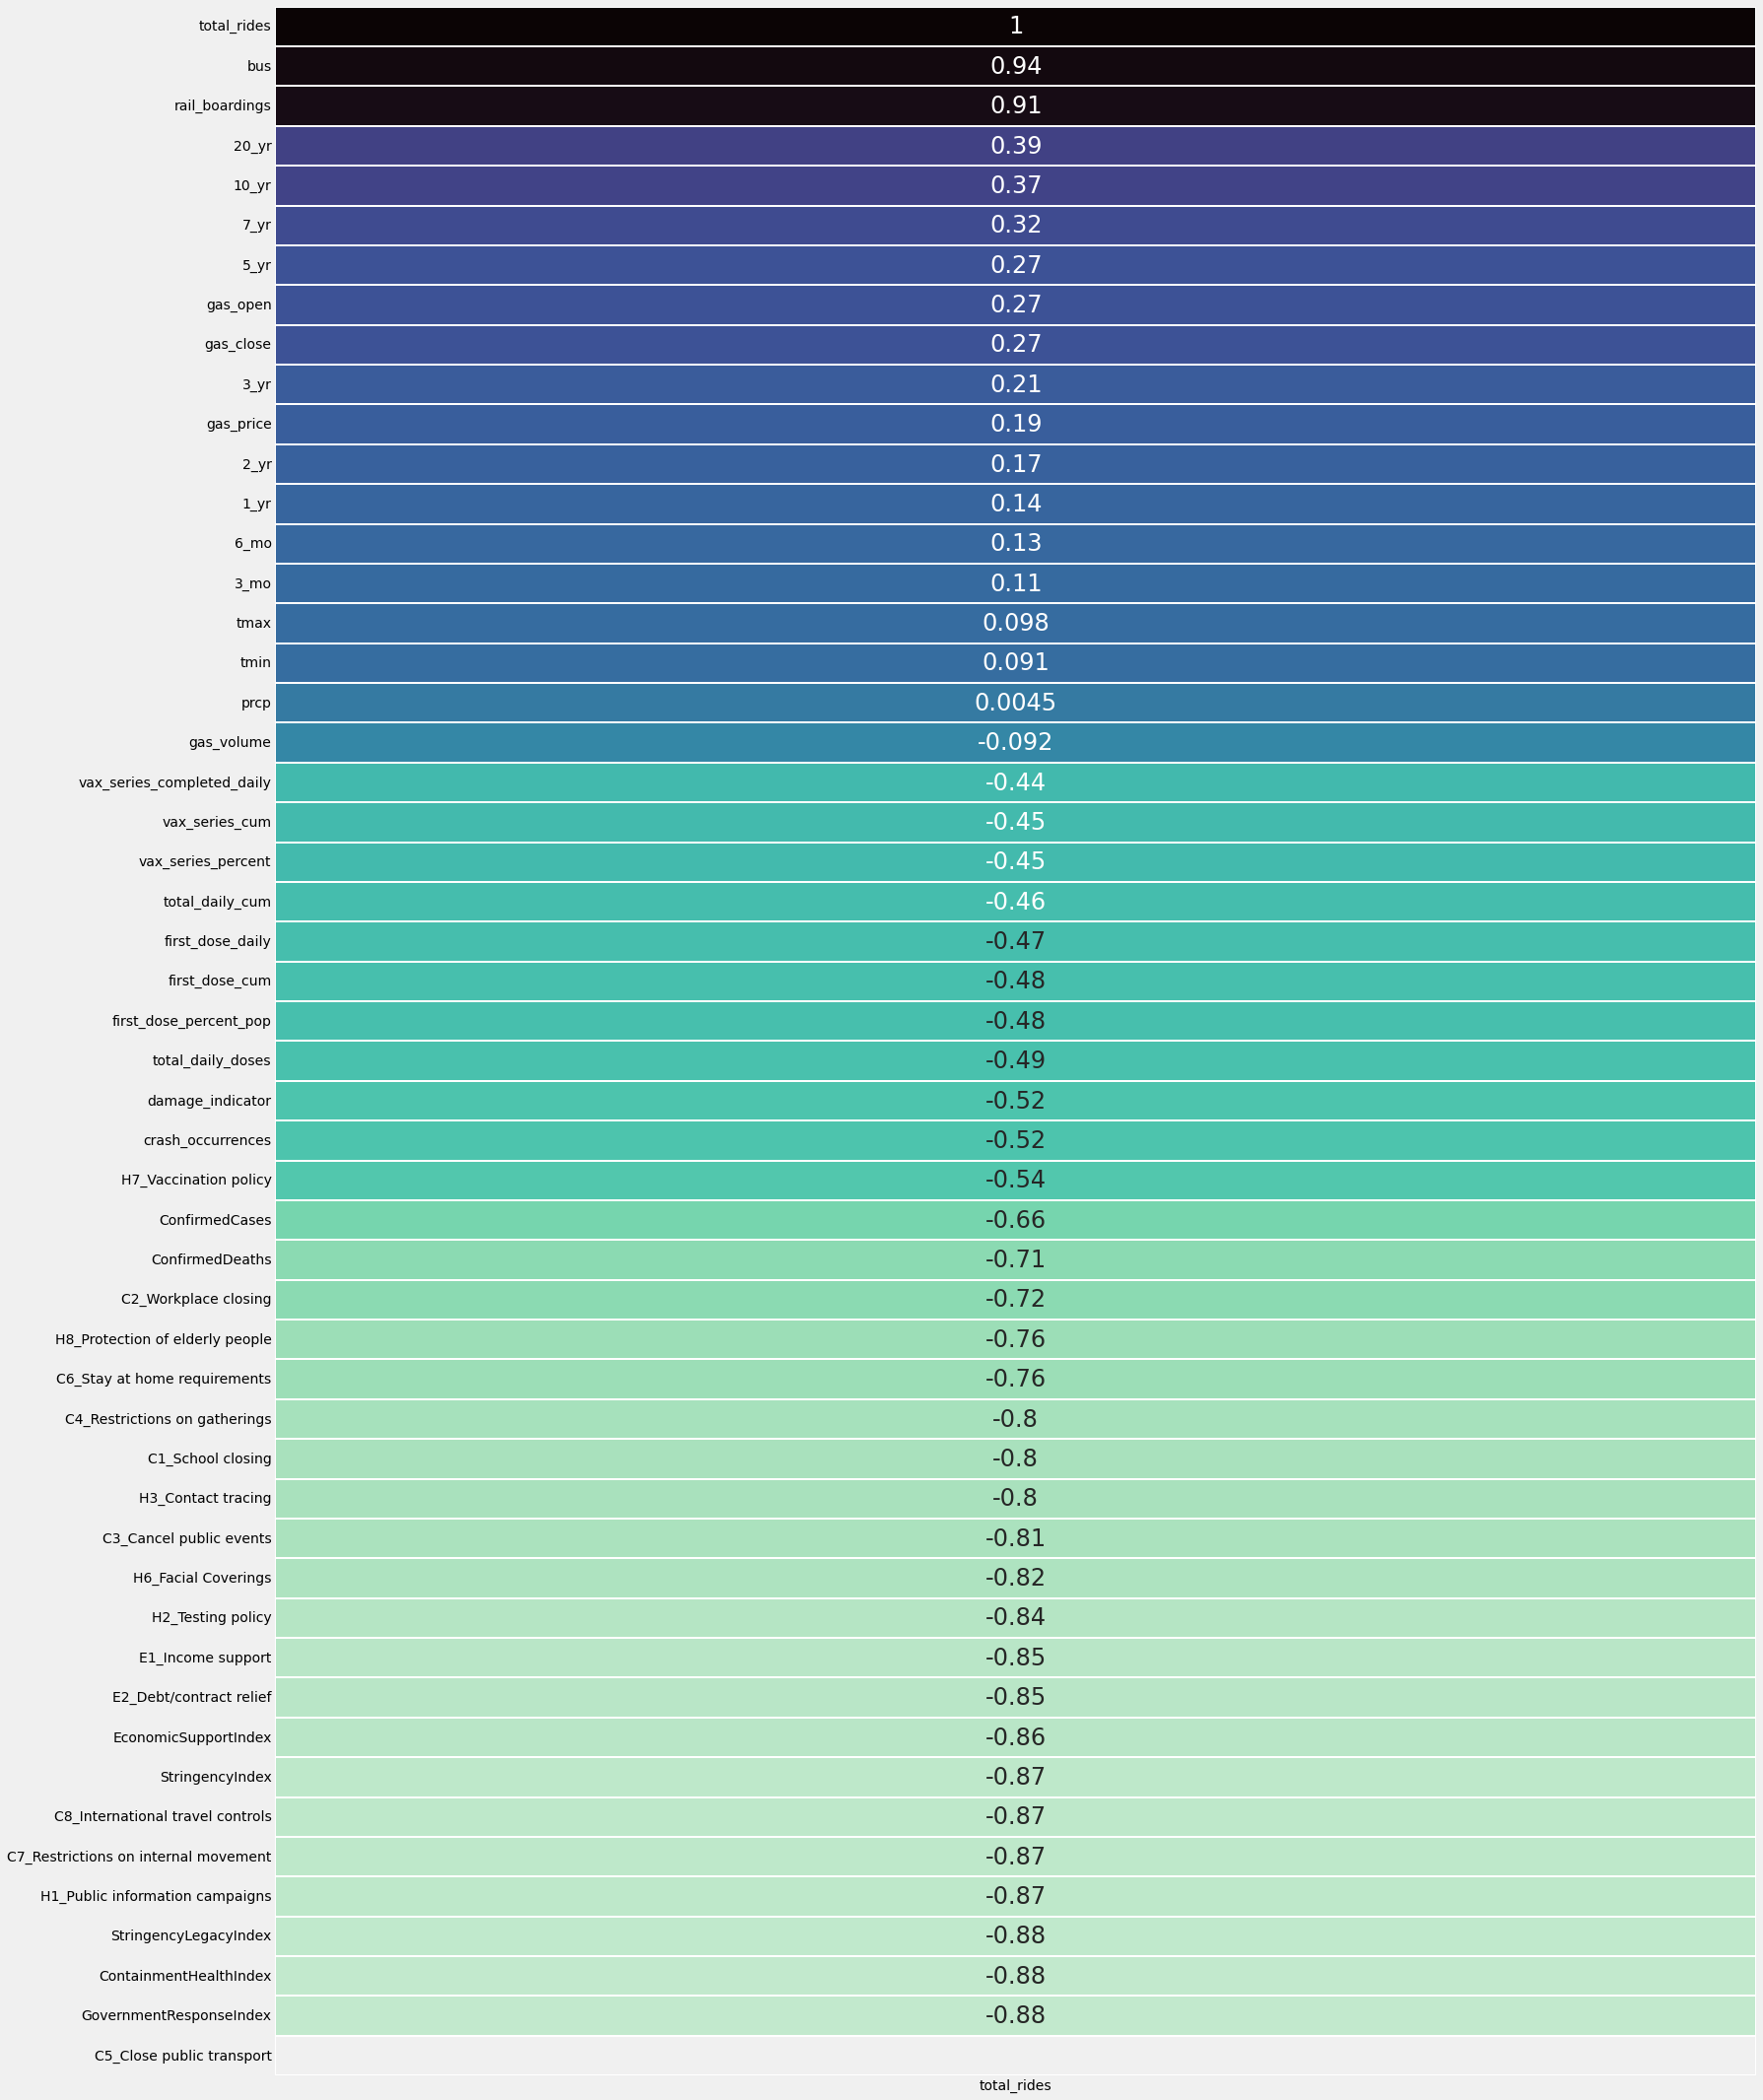

In [158]:
plt.figure(figsize=(24,36))
sns.heatmap(df.corr()[['total_rides']].sort_values(by='total_rides',ascending=False),vmin=-1,vmax=1,
            cmap= 'mako_r',linewidths=.1,annot=True, annot_kws={'fontsize':24},cbar=False);